  ## Veriye ilk bakış

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Veri setinin hikayesi nedir?

NASA'nın yayınladığı galaksilerin keşfi ile ilgili veri seti.

* **method** : Galaksilerin bulunma şekli
* **number** : Sistemlerdeki gezegen sayısı
* **orbital_period** : Yörünge dönemi
* **mass** : Kütle 
* **distance** : uzaklık
* **year** : keşif tarihi 

In [2]:
df = planets.copy()

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


## Veri seti yapısal bilgileri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [9]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Veri setinin betimlenmesi

In [10]:
df.shape

(1035, 6)

In [11]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik Değerlerin İncelenmesi

In [13]:
 # Hiç eksik gözlem var mı?
df.isnull().values.any()

True

In [14]:
# Hangi değişkende kaç tane var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [15]:
#df["degisken_ismi"].fillna(0,inplace=True)   ## Sıfır ile yer değiştirir.

In [16]:
#df["degisken_ismi"].fillna(df.degisken_ismi.mean,inplace=True)  ## Ortalama ile yer değiştirir.

Üstteki iki yöntem de tehlikeli bir yöntemdir ve veri setinin yapısını bozar. Genellikle kullanılmaz.

## Kategorik Değişken Özetleri

In [17]:
kat_df = df.select_dtypes(include = ["category"]) 
#df içinden istediğim tipte değiş. çekebilirim.

In [18]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [19]:
kat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [20]:
kat_df["method"].value_counts().count()

10

## Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [21]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

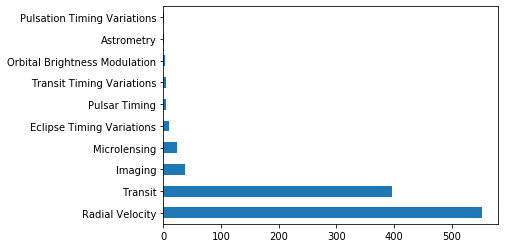

In [23]:
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özetleri

In [24]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [25]:
df_num = df.select_dtypes(include=["float64","int64"])

In [26]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [27]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [28]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [29]:
print("Ortalama: "+str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: "+str(df_num["distance"].count()))
print("Maksimum Değer: "+str(df_num["distance"].max()))
print("Minimum Değer: "+str(df_num["distance"].min()))
print("Medyan: "+str(df_num["distance"].median()))
print("Standart Sapma: "+str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


# Dağılım Grafikleri

## Barplot

Sütun grafikleri elimizdeki kategorik değişkenleri görselleştirmeye yarar.

### Veri Seti Hikayesi

* **price**: dolar cinsinden fiyat(326 - 18,823)
* **carat**: ağırlık (0.2 - 5.01)  
* **cut**: kalite (Fair,Good,Very Good,Premium,Ideal)
* **color**: renk (from J(worst) to D (best))
* **clarity**: temizliği,berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))
* **x**: uzunluk (mm) (0 - 10.74)
* **y**: genişlik(mm) (0 - 58.9)
* **z**: derinlik(mm) (0 - 31.8)
* **depth**: toplam derinlik yüzdesi (z/mean(x,y)) (43 - 79)
* **table**: elmasın en geniş noktasına göre genişliği (43 - 95)


In [30]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Veri Setine Hızlı Bakış

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [35]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [36]:
# ordinal Tanımlama
from pandas.api.types import CategoricalDtype

In [37]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [38]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True))

In [39]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [40]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

Sıralama, istenen sıralamaya uygun değil. Aşağıdaki işlemleri uygulayarak 
istenen sıralama elde edilebilir.

In [41]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [42]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered=True))

In [43]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [44]:
# barplot

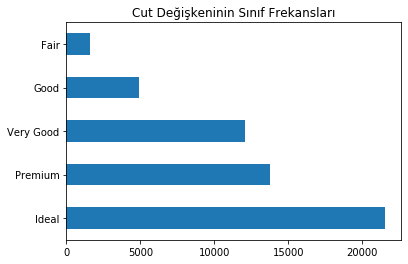

In [46]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

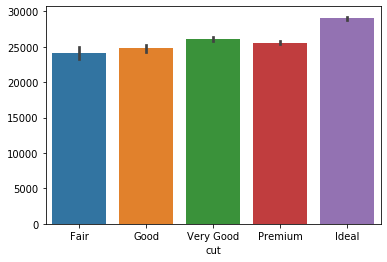

In [47]:
sns.barplot(x="cut",y=df.cut.index,data=df);

## Çaprazlamalar

In [49]:
df.head() # diamonds veri seti

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


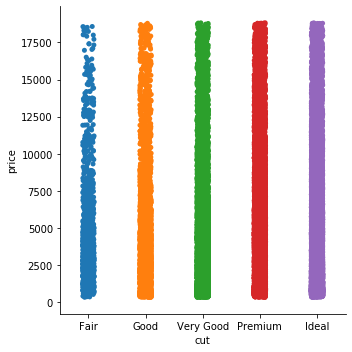

In [50]:
sns.catplot(x="cut",y="price",data=df);

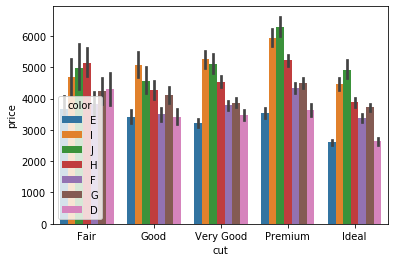

In [53]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [54]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

**barplot** fonksiyonuna **hue** argumanı ile 3. boyutu eklerken y eksenindeki değerler bozulmuş gibi gözükür. Aslında fonksiyon arka planda, boyutlar arasındaki değişkenliği ifade etmek için toplulaştırma işlemi yapar ve bize böyle çıktı döndürür.

### Histogram ve Yoğunluk

In [55]:
df.head() #diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


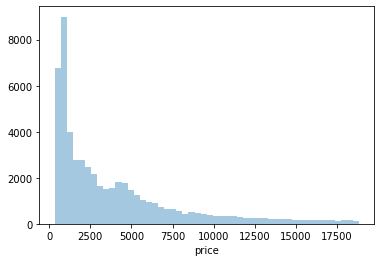

In [56]:
sns.distplot(df.price, kde = False);

In [57]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether

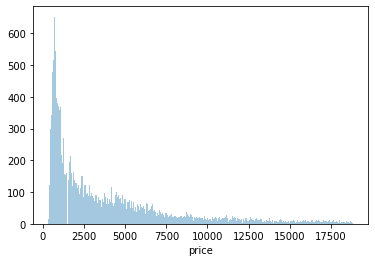

In [58]:
sns.distplot(df.price,bins=1000, kde = False);

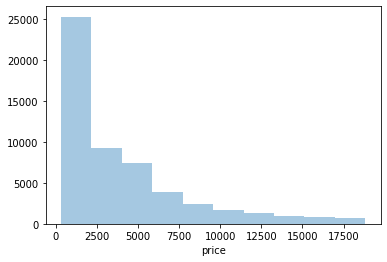

In [59]:
sns.distplot(df.price,bins=10, kde = False);

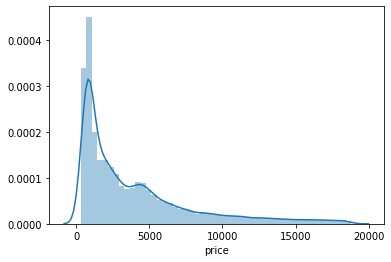

In [61]:
sns.distplot(df.price);

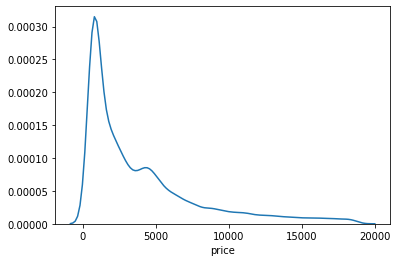

In [62]:
sns.distplot(df.price, hist=False);

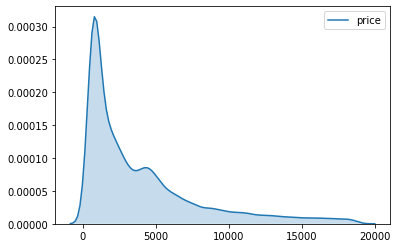

In [64]:
sns.kdeplot(df.price, shade=True);

### Histogram ve Yoğunluk Çaprazlamalar

In [65]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


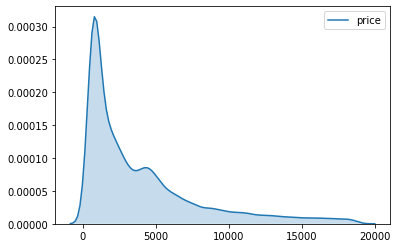

In [66]:
sns.kdeplot(df.price, shade=True);

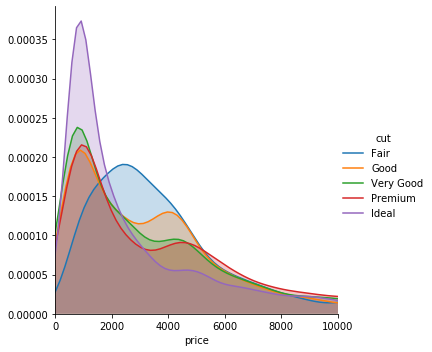

In [69]:
(sns
 .FacetGrid(df,
              hue= "cut",
              height=5,
              xlim=(0,10000))
.map(sns.kdeplot,"price",shade=True)
.add_legend()

);

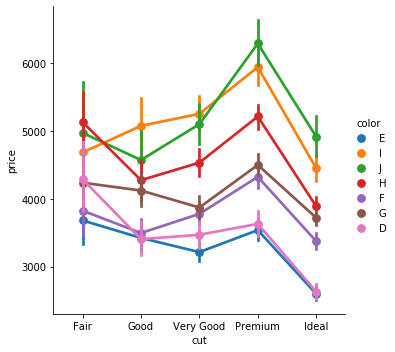

In [71]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

# Boxplot

## Veri Seti Hikayesi
* **total_bill**: yemeğin toplam fiyatı(bahşiş ve vergi dahil)
* **tip**: bahşiş
* **sex** : ücreti ödeyen kişinin ücreti (0=erkek, 1=kadın)
* **smoker**: Grupta sigara içen var mı? (0=hayır, 1=evet)
* **day**: gün (Thur=3,Fri=4,Sat=5,Sun=6)
* **time**: Ne zaman? (0=Öğle, 1=Akşam)
* **size**: Gruptaki kişi sayısı

In [73]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [75]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [76]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [77]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [78]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot Oluşturma

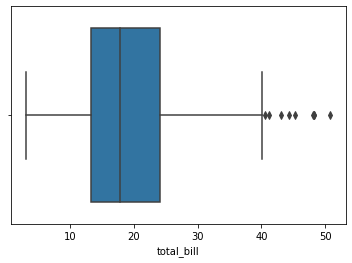

In [79]:
sns.boxplot(x = df["total_bill"]);

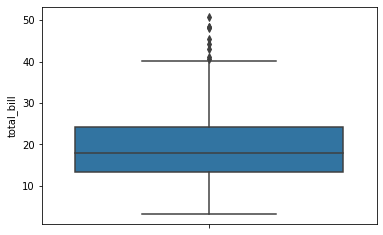

In [80]:
sns.boxplot(x = df["total_bill"],orient = "v");

## Çaprazlamalar

**Soru:** Hangi günler daha fazla kazanılıyor?

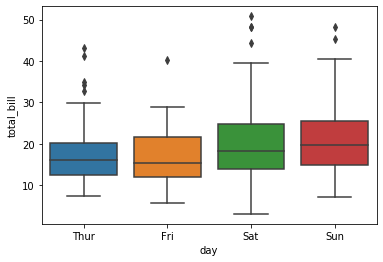

In [82]:
sns.boxplot(x="day",y="total_bill",data=df);

In [83]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Cumartesi yapılan ödeme sayısı 87, pazar günü yapılan ödeme sayısı 76. Buna rağmen pazar günü toplam ödenen para miktarının daha fazla olduğu grafikten gözlemlenebiliyor. Buradan pazar günü insanların daha özel buluşmalar yaptığı gibi çıkarımlar yapılabilir. 

**Soru:** Sabah mı akşam mı daha fazla kazanılıyor?

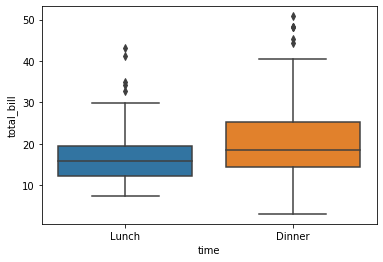

In [84]:
sns.boxplot(x="time",y="total_bill",data=df);

Görüldüğü üzere akşam saatlerinde daha fazla para kazanılıyor. Bu verilere ve önceki verilere bakılarak, bu restoranın en çok haftasonu günlerinin akşam saatlerinde para kazanacağını bilebiliriz. Bu mekanın sahibi, bu zaman dilimlerinde işinde iyi ve deneyimli kişileri çalıştırırsa alacağı verim maksimum olur.

**Soru:** Kişi sayısının kazanca etkisi nedir?

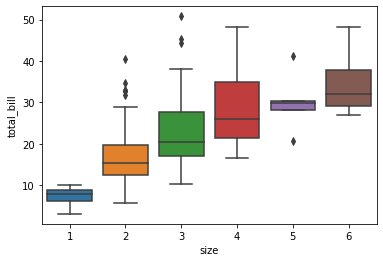

In [85]:
sns.boxplot(x="size",y="total_bill",data=df);

Yemek yiyen kişi sayısı arttığında ödenen para miktarının artması beklenir, görüldüğü üzere veriler de bunu doğruluyor. Fakat bunun tersi de mümkün olabilir.

**SORU:** Kadınlar hangi gün daha fazla hesap öder?

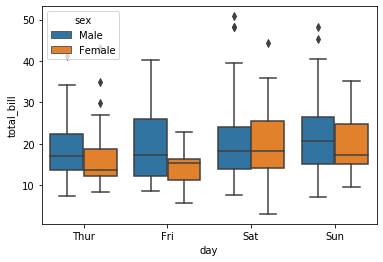

In [87]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df);

Kadınlar grafikten de görüldüğü gibi Cumartesi günleri erkeklerden daha fazla hesap öder.

## Violin

In [88]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


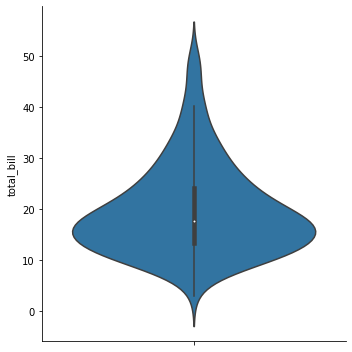

In [89]:
sns.catplot(y="total_bill",kind="violin",data=df);

### Violin Grafiği Çaprazlamaları

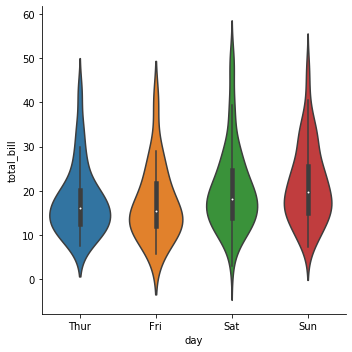

In [90]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df);

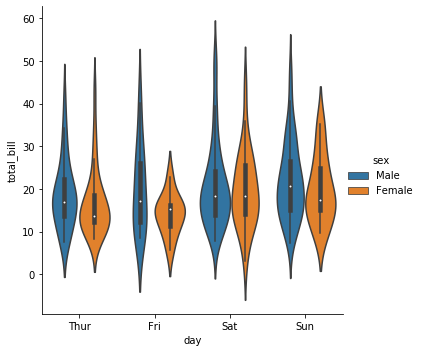

In [91]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="violin",data=df);

## Korelasyon Grafikleri

### Scatterplot

In [92]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


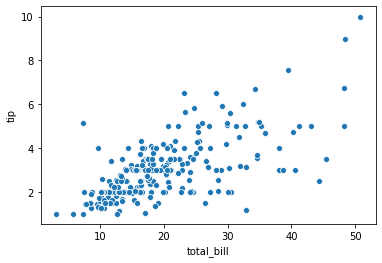

In [94]:
sns.scatterplot(x="total_bill",y="tip",data=df);

## Çaprazlamalar

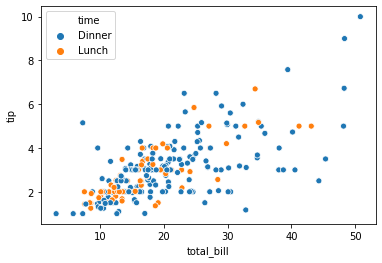

In [95]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

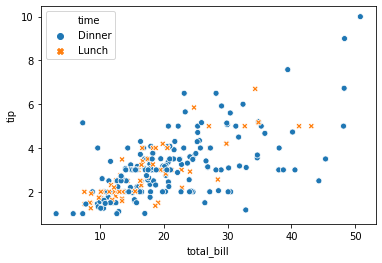

In [96]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df);

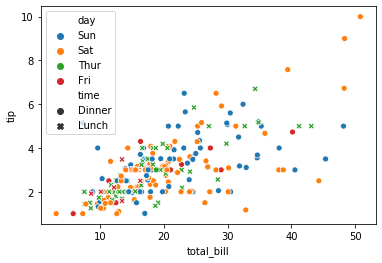

In [97]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);

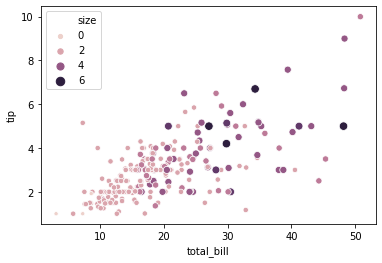

In [99]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df);

## Doğrusal İlişkinin Gösterilmesi

In [100]:
import matplotlib.pyplot as plt

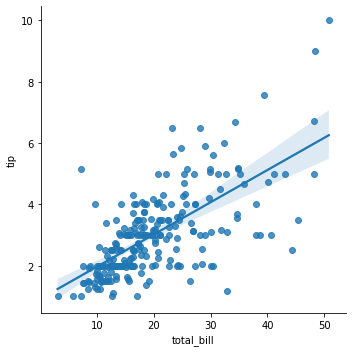

In [101]:
sns.lmplot(x="total_bill",y="tip",data=df);

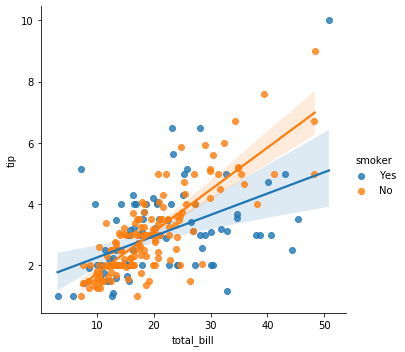

In [102]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

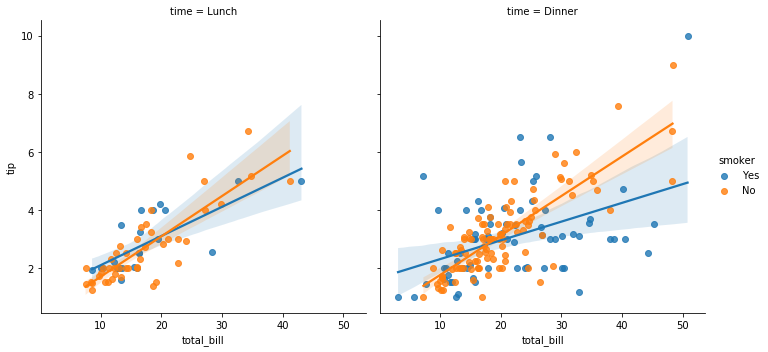

In [103]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

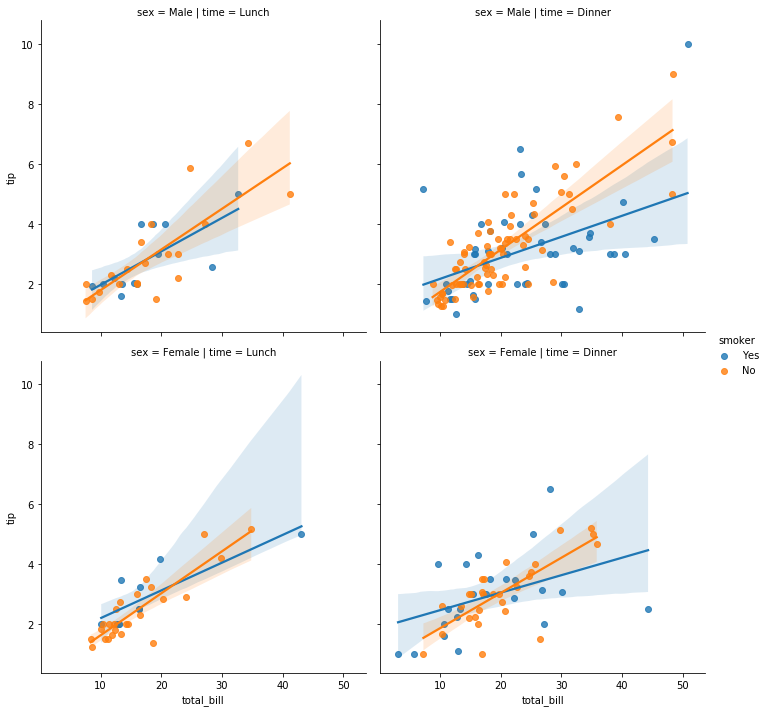

In [105]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

### Scatterplot matrisi

In [106]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [108]:
df.shape

(150, 5)

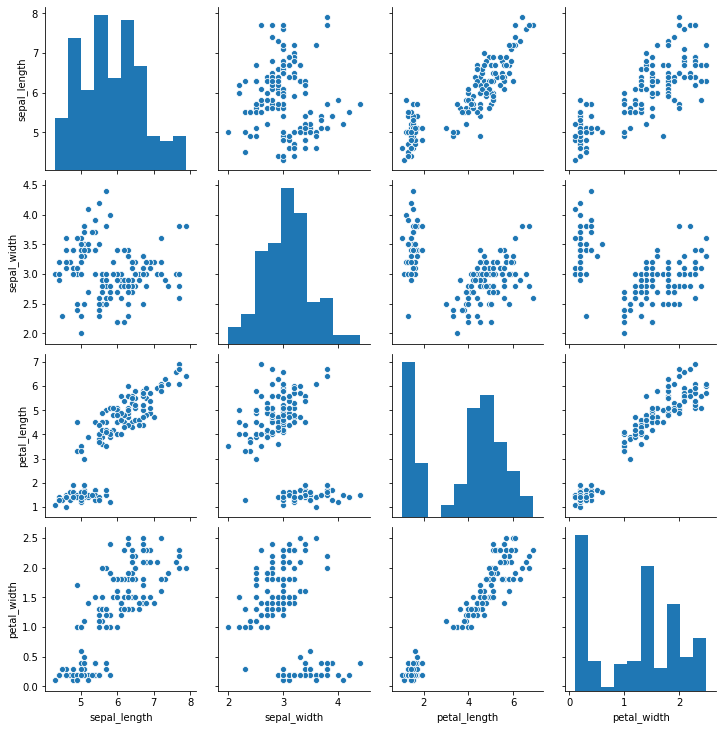

In [110]:
sns.pairplot(df);

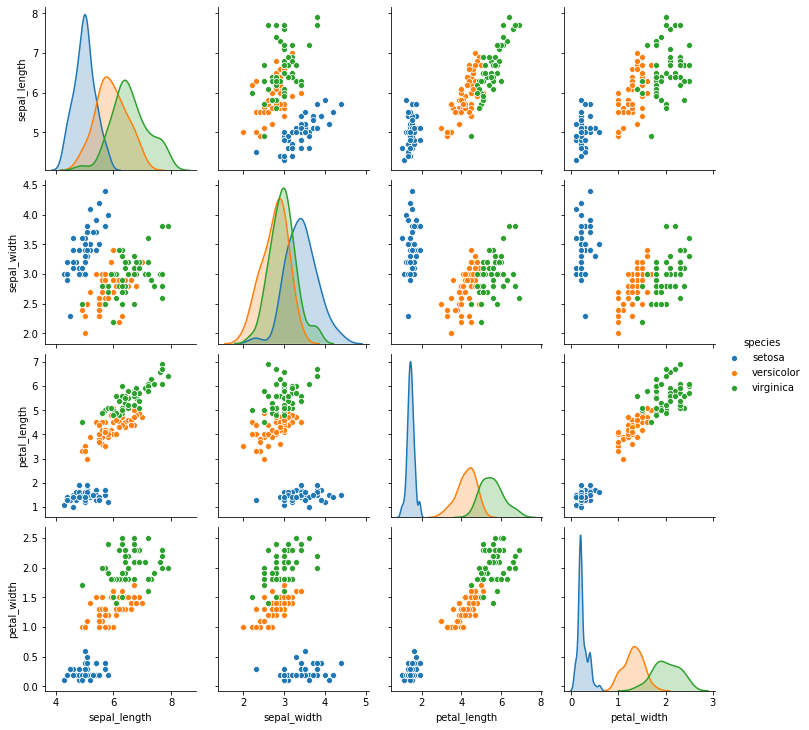

In [111]:
sns.pairplot(df,hue="species");

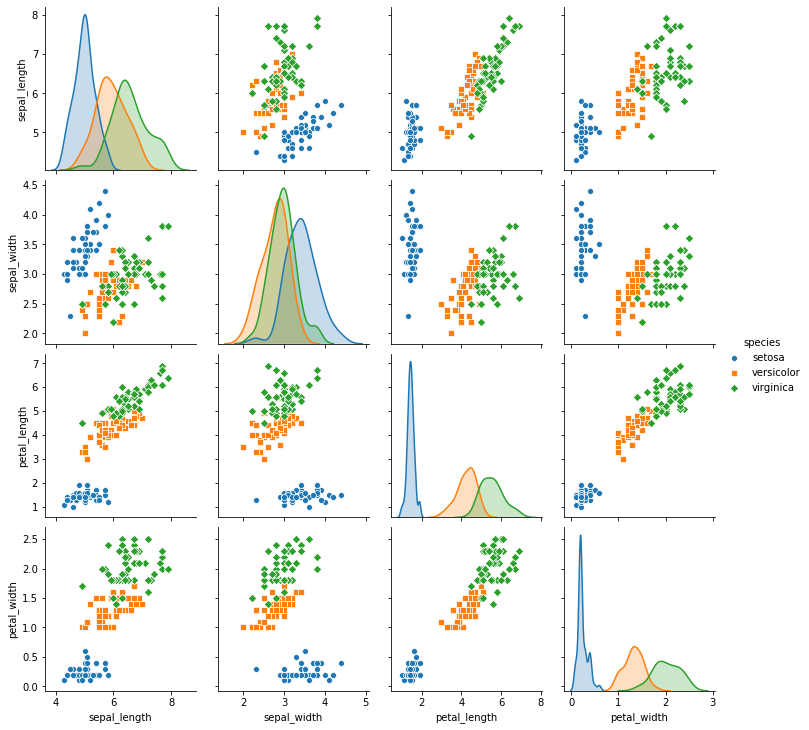

In [112]:
sns.pairplot(df,hue="species",markers=["o","s","D"]);

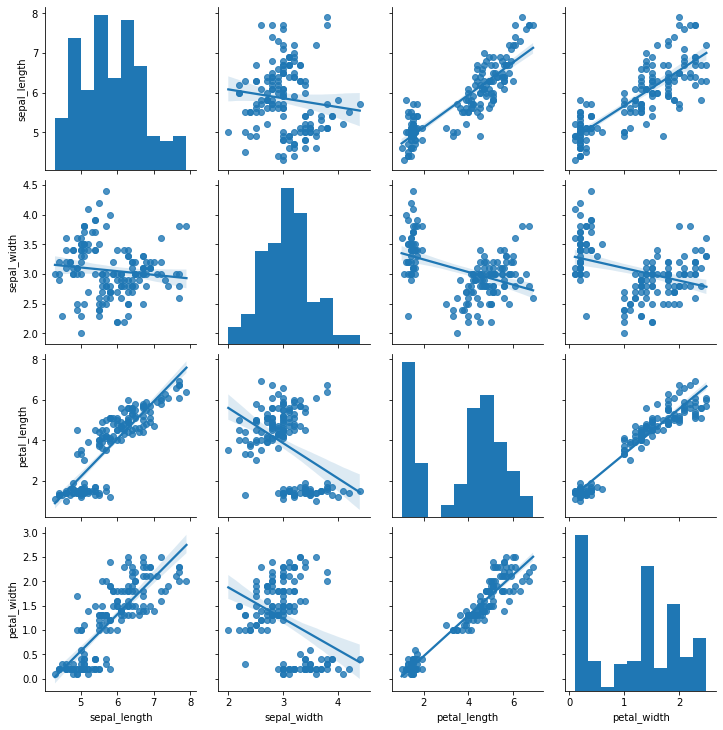

In [113]:
sns.pairplot(df,kind="reg");

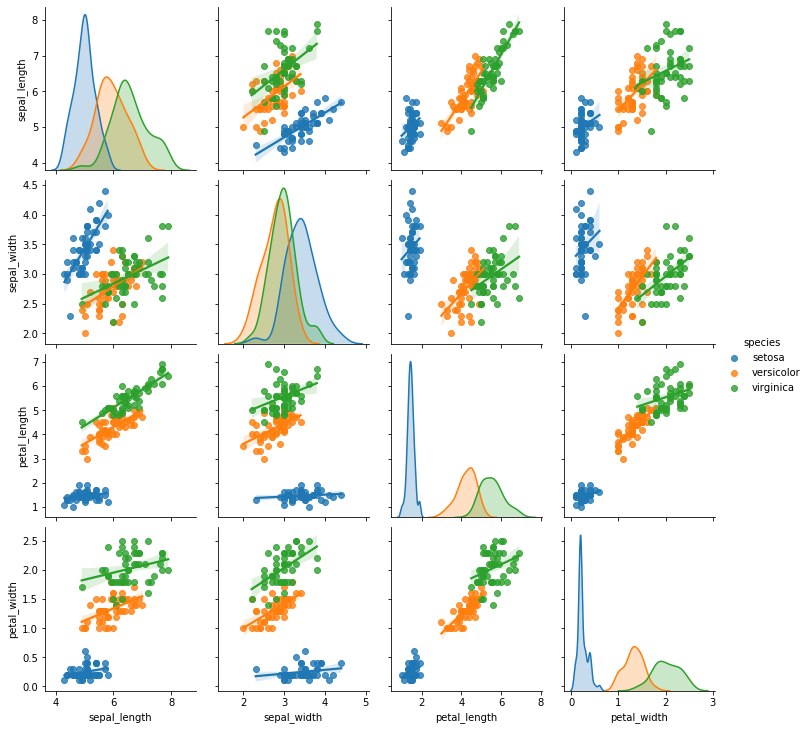

In [114]:
sns.pairplot(df,kind="reg",hue="species");

## Heatmap

In [131]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [132]:
df.shape

(144, 3)

In [133]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [134]:
df = df.pivot("month","year","passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


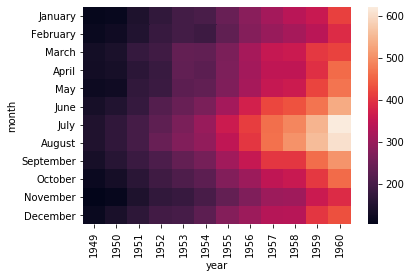

In [135]:
sns.heatmap(df);

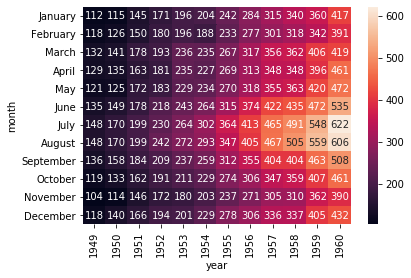

In [136]:
sns.heatmap(df,annot=True,fmt="d");

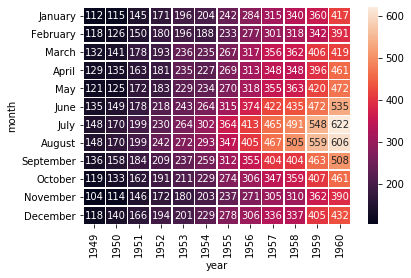

In [137]:
sns.heatmap(df,annot=True,fmt="d",linewidths=.5);

## Çizgi Grafik

In [138]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [139]:
df.shape

(1064, 5)

In [141]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [142]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [143]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [144]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [145]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### Çizgi Grafik ve Çarprazlamalar

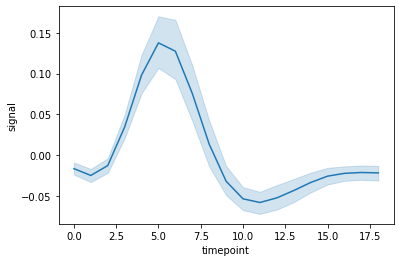

In [146]:
sns.lineplot(x="timepoint",y="signal",data=df);

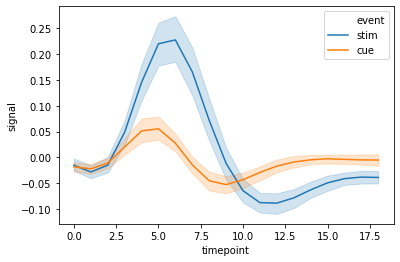

In [147]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df);

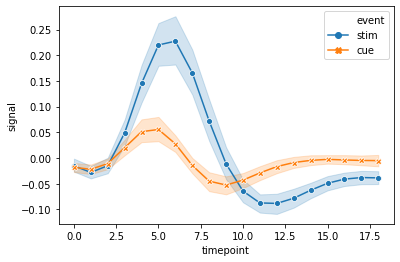

In [148]:
 sns.lineplot(x="timepoint",
              y="signal",
              hue="event",
              style="event",
              markers=True,
              dashes=False,
              data=df);

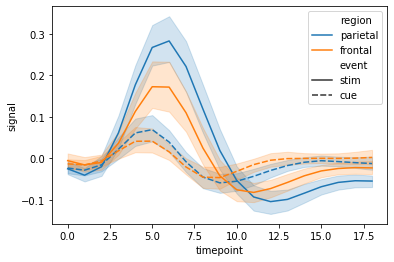

In [149]:
 sns.lineplot(x="timepoint",
              y="signal",
              hue="region",
              style="event",
              data=df);

## Basit Zaman Serisi Grafiği

In [150]:
!pip install pandas_datareader
import pandas_datareader as pr

In [151]:
df = pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.323219
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.713696
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.249626
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.268383
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.386133


In [152]:
df.shape

(917, 6)

In [153]:
kapanis = df["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

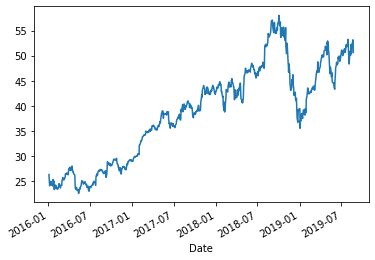

In [154]:
kapanis.plot();

In [155]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [156]:
kapanis.index = pd.DatetimeIndex(kapanis.index)
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

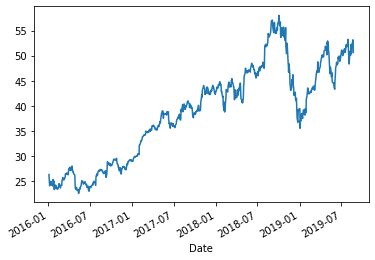

In [157]:
kapanis.plot();